# Example runs of linear models

This notebook shows some example runs of the models in "linear_models.py".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from linear_models import Perceptron
from common import find_accuracy, find_mse, plot_2d_blobs
np.random.seed(57)

## Perceptron

Let us first start with the perceptron. The perseptron is a model with linear weights and a Heaviside activiation / output function. It can be used for binary or multiclass classification. It updates its weight only with a wrong guess.

It is pretty limited in its flexibility, since it can only make a *linear decision boundry*. However, with many output nodes it can still classify according to many linearities, and if the data is *linearly seperably* (it can be perfectly classified with a linear boundry), the Perceptron will always converge in a finite amount of steps.

Let us first then start to look at some data that is linearly seperable. We will just look at the flexibility, so we do not split in training and validation sets.

## Binary classification with two input features

With two features and two classes we can easily plot the data and decision boundry.

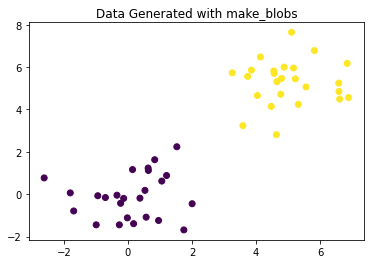

In [2]:
np.random.seed(57)
n_observations = 50
n_features = 2
centers = [[0, 0], [5, 5]]  # Make the centers far from each other so it becomes linearly seperable.
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")

In [3]:
cl = Perceptron(n_features=2, n_outputs=1)
cl.train(x_blobs, y_blobs, batch_size=11, epochs=10)
preds = cl.predict(x_blobs)
print(f"Accuracy for Perceptron model was {find_accuracy(preds[:, 0], y_blobs)}")

Early stopping in Perceptron after epoch 4
Accuracy for Perceptron model was 1.0


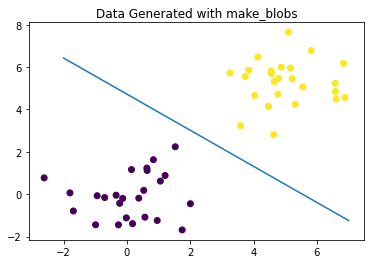

In [4]:
# Plot the decision boundry (solve w_0 * bias + w_1 * x_1 + w_2 * x_2 = 0 with respect to x_2).
x_values = np.linspace(-2, 7)
y_values = - cl.weights[0, 0] / cl.weights[0, 1] * x_values - cl.biases[0] / cl.weights[0, 1]
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")
plt.plot(x_values, y_values)
plt.show()

We see that the Perceptron manage to converge (rather quickly) to a decision boundry that perfectly classified the data.

## Mutliclass classification

Let us now look at multiclass classification. We then need many output nodes for the perceptron. We also need to one-hot-econde the target.

Early stopping in Perceptron after epoch 2
Accuracy for Perceptron model was 1.0


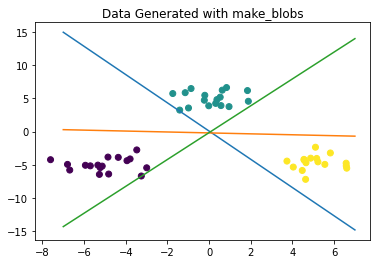

In [5]:
# Many output features:
np.random.seed(57)
n_observations = 50
n_features = 2
centers = [[-5, -5], [0, 5], [5, -5]]  # Be sure to make the data linearly seperable
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")

# OneHotEconde
y2 = np.zeros((y_blobs.size, y_blobs.max() + 1))
y2[np.arange(y_blobs.size), y_blobs] = 1

cl = Perceptron(2, 3)
cl.train(x_blobs, y2, batch_size=11, epochs=100)

preds = cl.predict(x_blobs)
# Plot decision boundry (solve w_0 * bias + w_1 * x_1 + w_2 * x_2 = 0 with respect to x_2, for each output node)
x_values = np.linspace(-7, 7, 100)
y_values1 = - cl.weights[0, 0] / cl.weights[0, 1] * x_values - cl.biases[0, 0] / cl.weights[0, 1]
y_values2 = - cl.weights[1, 0] / cl.weights[1, 1] * x_values - cl.biases[1, 0] / cl.weights[1, 1]
y_values3 = - cl.weights[2, 0] / cl.weights[2, 1] * x_values - cl.biases[2, 0] / cl.weights[2, 1]

plt.plot(x_values, y_values1)
plt.plot(x_values, y_values2)
plt.plot(x_values, y_values3)
print(f"Accuracy for Perceptron model was {find_accuracy(preds, y2)}")

We see that it again quickly converges to a perfect classification.

## Many input features

Let us try with many input features and output nodes. This can not be plotted easily, so we will just see if it converges and classifies correctly.

In [6]:
# Many input features (5):
np.random.seed(57)
n_observations = 50
n_features = 5
centers = [[0, 0, 0, 0, 0], [0, 10, 0, 0, 0], [10, 10, 0, 0, 0], [10, 0, 0, 0, 0]]
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1, 1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)

y2 = np.zeros((y_blobs.size, y_blobs.max() + 1))
y2[np.arange(y_blobs.size), y_blobs] = 1

cl = Perceptron(n_features, 4)
cl.train(x_blobs, y2, batch_size=11, epochs=100)
preds = cl.predict(x_blobs)

print(f"Accuracy for Perceptron model was {find_accuracy(preds, y2)}")

Early stopping in Perceptron after epoch 87
Accuracy for Perceptron model was 1.0


## Non-linearly seperable data

When the data is non lnearly separable, the Perceptron will sometimes find a decent boundry, but will not converge.

Accuracy for Perceptron model was 0.96


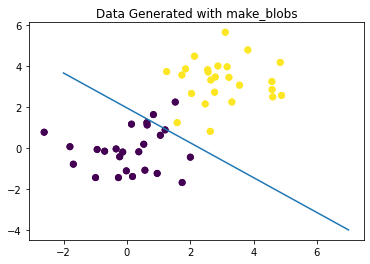

In [7]:
np.random.seed(57)
n_observations = 50
n_features = 2
centers = [[0, 0], [3, 3]]  # Make the centers far from each other so it becomes linearly seperable.
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")
cl = Perceptron(n_features=2, n_outputs=1)
cl.train(x_blobs, y_blobs, batch_size=11, epochs=10)
preds = cl.predict(x_blobs)
print(f"Accuracy for Perceptron model was {find_accuracy(preds[:, 0], y_blobs)}")
# Plot the decision boundry (solve w_0 * bias + w_1 * x_1 + w_2 * x_2 = 0 with respect to x_2).
x_values = np.linspace(-2, 7)
y_values = - cl.weights[0, 0] / cl.weights[0, 1] * x_values - cl.biases[0] / cl.weights[0, 1]
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")
plt.plot(x_values, y_values)
plt.show()